In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep=";")
df = pd.read_csv('marketing_campaign.csv', sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'] = df['Income'].fillna((df['Income'].median()))
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#Age : this year (example 2014) - Year birth
df['Age'] = 2014 - df['Year_Birth'] 

#customer month
df['Customer_Months'] = (pd.to_datetime("2014-12-31") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'M')  

display(df.head(3))
print('')
display(df.tail(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age,Customer_Months
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,57,27
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,0,60,9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,49,16


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age,Customer_Months
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1,33,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,0,58,11
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,3,11,1,0,60,26


In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months'],
      dtype='object')

In [9]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [10]:
# kategori YOLO, Alone, Absurd pada marital_status dimasukkan ke dalam kategori Single karena memiliki pengertian yang sama
df = df.replace({'Marital_Status' : {'YOLO' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single'}})
print(df['Marital_Status'].value_counts())

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


## Descriptive Statistics

In [11]:
df.describe().T
#stats.trim_mean(df['Income'], 0.05) 

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


- Tidak terdapat nilai duplikat pada data
- Semua tipe data sudah sesuai kecuali pada variabel Dt_Customer sehingga diconvert menjadi date type kemudian dibuat variabel baru untuk mendapatkan lama customer join ke company
- Variabel income memiliki mean dan median yang hampir sama, namun nilai max yang sangat tinggi menunjukkan adanya indikasi outlier
- Tidak ada nilai statistika yang aneh pada variabel kidhome, teenhome, dan recency
- Pada variabel amount spent on products terlihat bahwa SEMUA PRODUK memiliki mean yang lebih besar dari median yang menandakan pola distribusi positively skewed
- Sementara itu, tidak terjadi keanehan nilai statistik pada number of purchase
- Meskipun variabel age tidak menunjukkan statistik yang aneh, namun terlihat bahwa usia customer tertua yaitu 121 tahun dimana nilai ini sangat jauh dari rata-rata
- Variabel customer_months memiliki pola distribusi yang simetris, dapat dilihat dari nilai mean median yang hampir sama
- Kolom Z_CostContact dan Z_Revenue tidak dimasukkan dalam pemodelan karena mengandung nilai yang sama
- Terdapat missing value pada variabel income sebanyak 1.07 %, dilakukan imputasi menggunakan median

## Univariate Analysis

In [12]:
demographic = ['Income', 'Age', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot' ]
spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

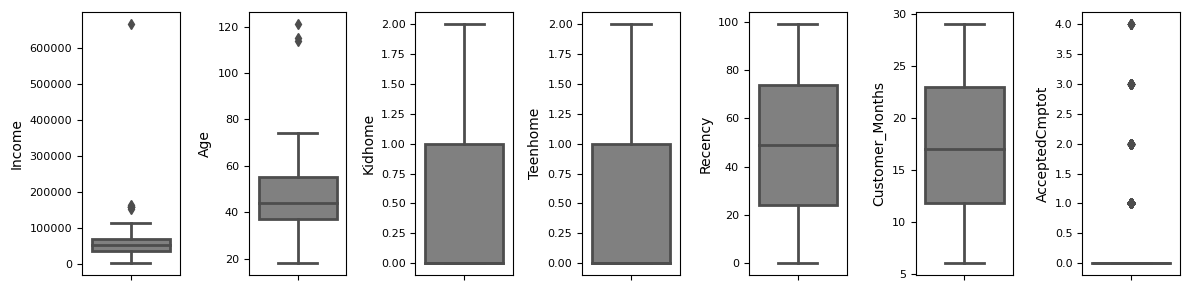

In [13]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='grey', orient='v')
    plt.tight_layout()

- Variabel Income memiliki outlier yang sangat tinggi sehingga dilakukan penanganan menggunakan nilai batas atas
- Outlier pada variabel age tidak diatasi
- Recency dan customer month terlihat memiliki pola distribusi yang simetris

In [14]:
df['Income_new'] = df['Income']

In [15]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [16]:
low, high = outlier(df['Income_new'])

In [17]:
#replacing outlier with upper bound and lower bound value
df['Income_new'] = np.where(df['Income_new']>high, high, df['Income_new'])
df['Income_new'] = np.where(df['Income_new']<low, low, df['Income_new'])

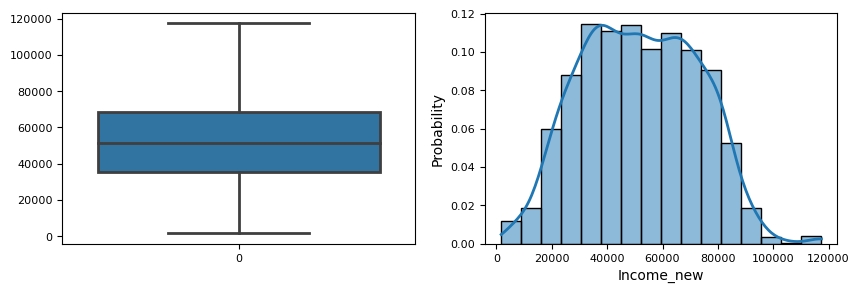

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.boxplot(ax=axes[0], data = df['Income_new'])
sns.histplot(ax=axes[1], data = df, x = "Income_new", kde = True, stat = "probability", bins=int(80/5))
plt.show()

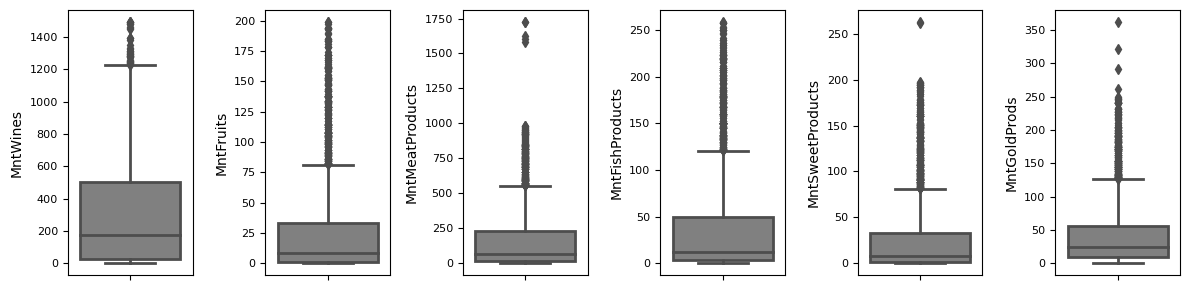

In [19]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=df[spent[i]], color='grey', orient='v')
    plt.tight_layout()

Dari penggambaran boxplot diketahui bahwa amount purchases untuk produk Wine memiliki nilai tertinggi, dimana sebaran data dari 0 - 500 sampai memiliki customer outlier dengan pembelian mencapai 1200 - 1400 dollar.

Dari visual boxplot juga diketahui bahwa persebaran setiap produk memiliki pola right skewness dimana nilai mean lebih besar dari median dengan frekuensi terbesar untuk pembelian Wine berada pada range 180. Berdasarkan boxplot diatas customer sangat menyukai produk wine dari store ini sehingga menjadi peluang untuk campaign selanjutnya mempromosikan Wine. 

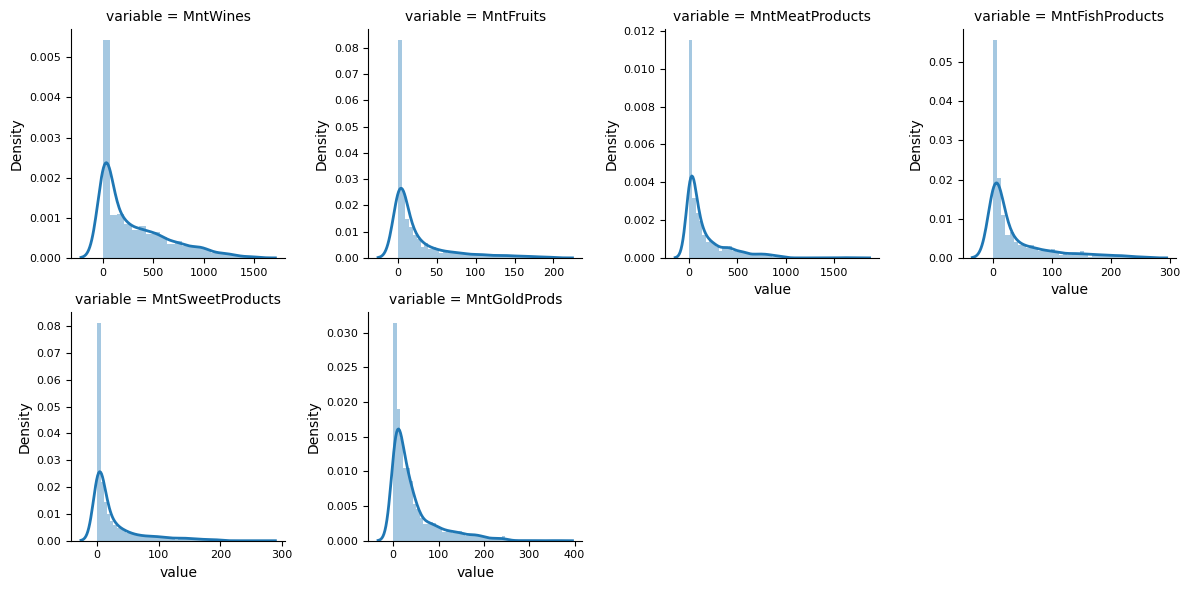

In [20]:
#Analisis Untuk Amount Spent dari customer untuk setiap produk 
df1 = pd.DataFrame(data=df, columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
nd = pd.melt(df1, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1
plt.show()

Dari persebaran grafik diatas dapat dilihat bahwa customer sangat tertarik untuk berbelanja produk Wine.

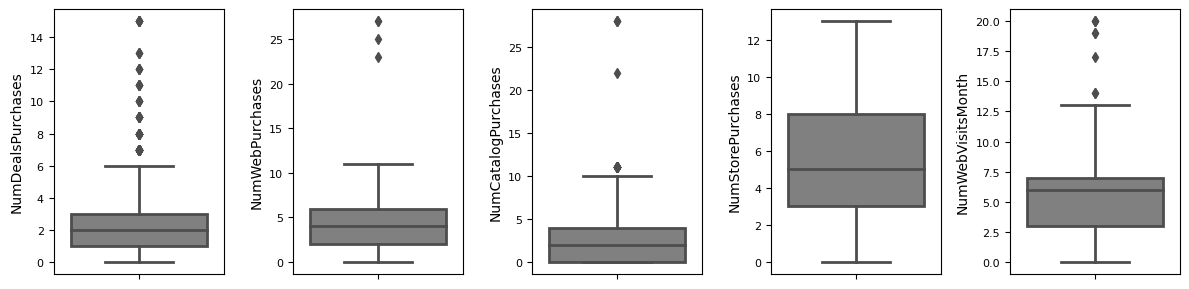

In [21]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=df[purchase[i]], color='grey', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat ditunjukkan bahwa customer sering berbelanja apabila ada diskon dimana persebaran data NumDealsPurchases atau pembelian langsung berada pada range 1-3 dengan banyak outlier diatas 6 kali pembelian.

Selain itu customer untuk store ini juga sering berbelanja langusng dimana NumStorePurchases memiliki persebaran dengan left skewed dengan nilai rage antara 3 - 8 dengan tidak ada outlier.

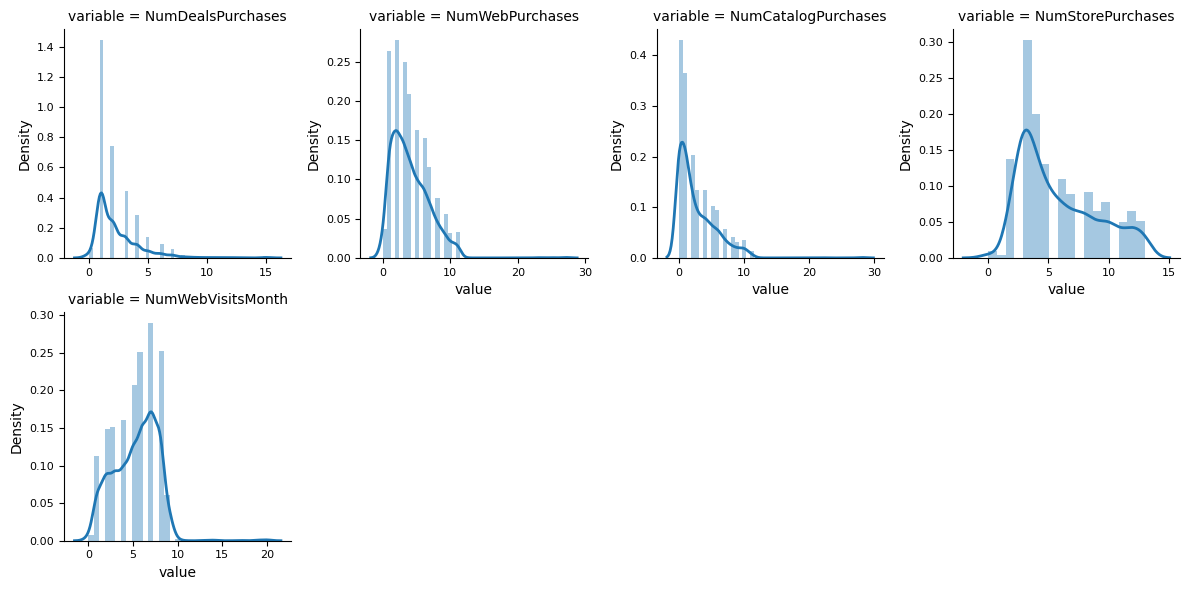

In [23]:
##Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

Berdasarkan persebaran grafik diatas customer lebih memilih untuk berbelanja langsung ke lokasi store langsung.

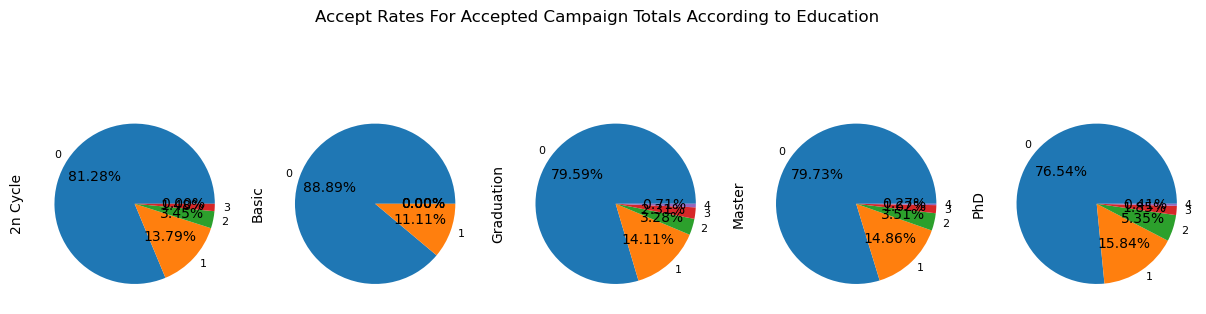

In [24]:
campaigns = ["AcceptedCmptot"]
for i in campaigns:
    pd.crosstab(index= df[i] , columns=df['Education']).plot(kind="pie", figsize=(15, 4), subplots=True, autopct='%1.2f%%',
                                                                 legend=False, title=f"Accept Rates For Accepted Campaign Totals According to Education")
    plt.show()

Dari pie chart diatas, dapat ditunjukkan bahwa semakin tinggi tingkat pendidikan, kemungkinan untuk customer accept campaign juga semakin besar.

## Multivariate Analysis

### Hubungan variabel dengan target

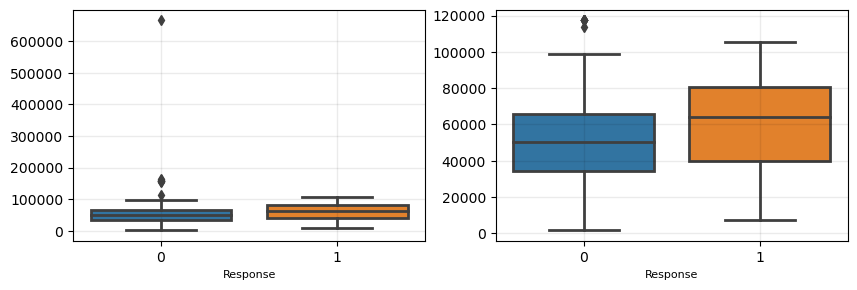

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.boxplot(ax=axes[0], y='Income', x='Response', data=df)
sns.boxplot(ax=axes[1], y='Income_new', x='Response', data=df)

for ax in axes:
    ax.grid(c = 'black', lw = 1, axis = 'both', alpha = 0.08)
    ax.set_ylabel(None)
    ax.set_xlabel('Response', fontsize=8)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

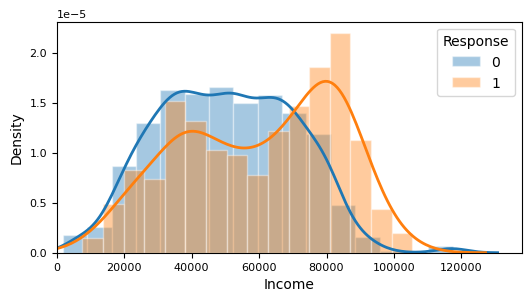

In [27]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Income_new'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

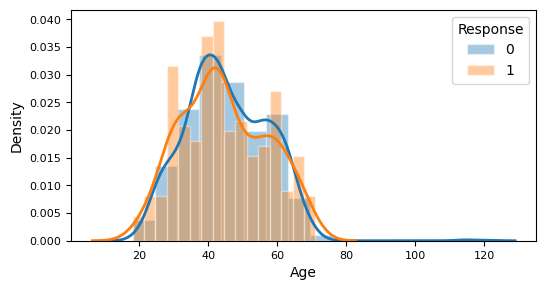

In [28]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Age'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

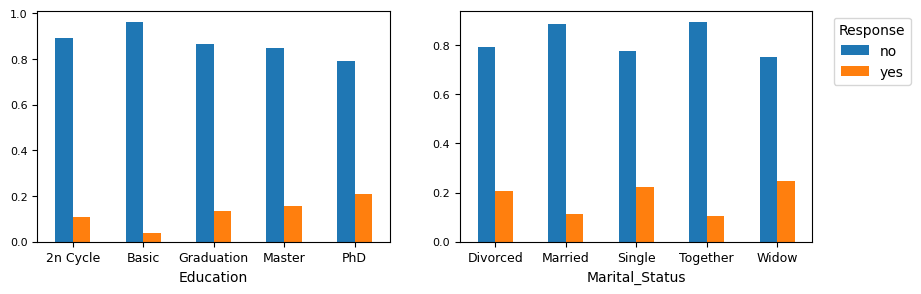

In [29]:
byEducation = df.groupby('Education').Response.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["no", "yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

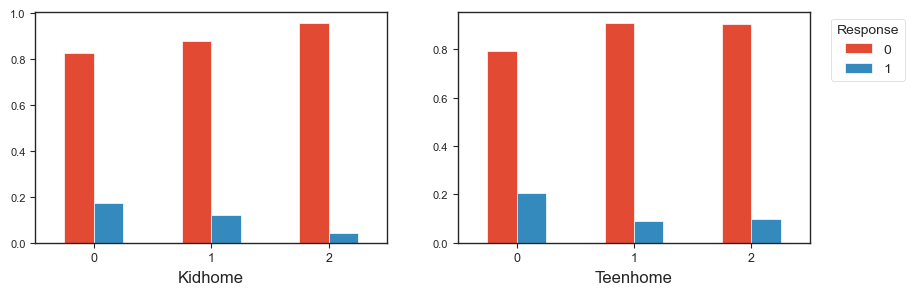

In [51]:
bykidhome = df.groupby('Kidhome').Response.value_counts(normalize=True)
byteenhome = df.groupby('Teenhome').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = bykidhome.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byteenhome.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

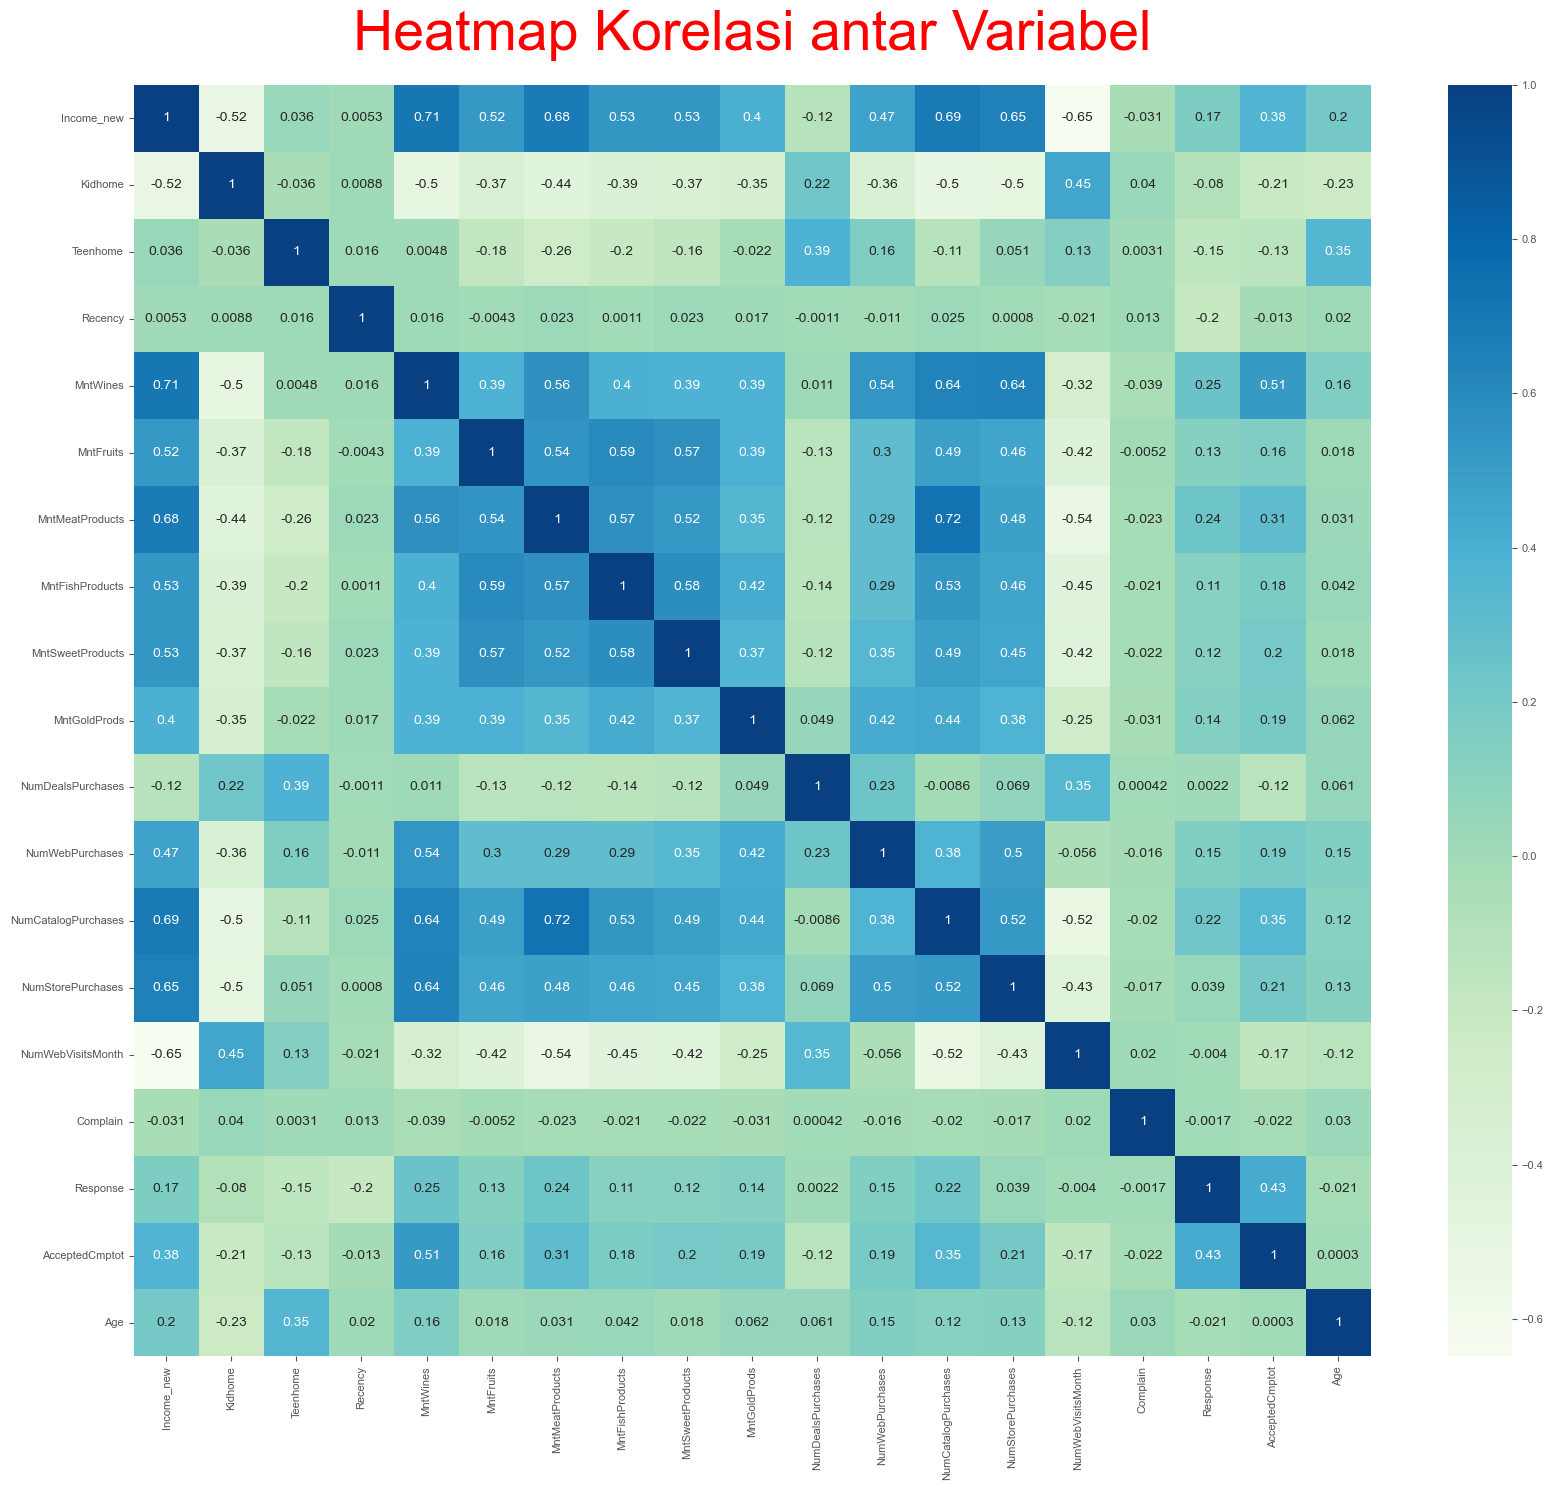

In [53]:
 #heatmap korelasi masing-masing variabelnya
plt.figure(figsize=(17,15))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df[['Income_new', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmptot',
                   'Age']].corr(), annot=True, cmap ='GnBu')
plt.title('Heatmap Korelasi antar Variabel', fontsize = 40, pad = 25, color = 'r')
plt.tight_layout()
plt.show()

*   Korelasi antara jumlah anak kecil dalam rumah tangga cukup besar, namun berbanding terbalik dengan jumlah pendapatan. Maka, **semakin tinggi pendapatan, semakin kecil sedikit juga jumlah anak kecil yang dimiliki**.
*   Variabel lain yang memiliki korelasi yang cukup tinggi dengan pendapatan ialah jumlah konsumsi semua produk, serta jumlah pembelian melalui web, catalog, dan toko.
*   Dapat diketahui pula jika variabel umur memiliki korelasi positif dengan pendapatan, namun tidak signifikan. Sehingga dapat disimpulkan, bahwa** semakin tinggi pendapatan kustomer 'umumnya' semakin tua juga umurnya.**
*   Pembelian melalui toko dengan katalog memiliki korelasi yang cukup besar dan berbanding lurus dengan pembelian produk. Berbeda dengan pembelian melalui website yang berbanding terbalik, sehingga **umumnya kustomer membeli produk melalui toko dan katalog.**
*   Jumlah pembelian wine dengan jumlah iklan yang diterima (accepted campaign) cukup besar dan berbanding lurus, dari hal tersebut dapat diketahui bahwa **umumnya kustomer membeli wine karena tergiur oleh iklan.** hmm... 🤔









<b> rfm metrics </b>

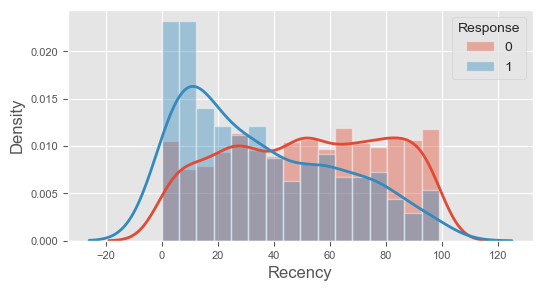

In [55]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Recency'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

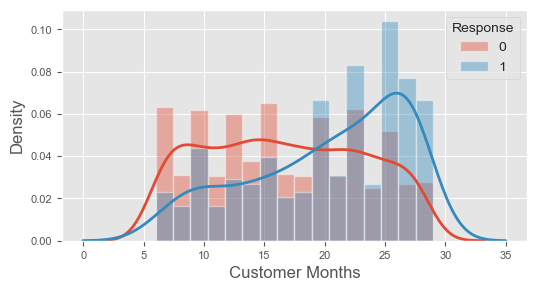

In [56]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Customer_Months'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Customer Months')
plt.ylabel('Density')
plt.show()

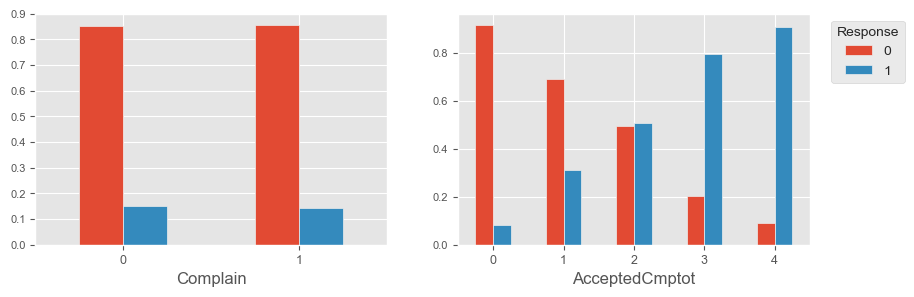

In [57]:
bycomplain = df.groupby('Complain').Response.value_counts(normalize=True)
bycampaign = df.groupby('AcceptedCmptot').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = bycomplain.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = bycampaign.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

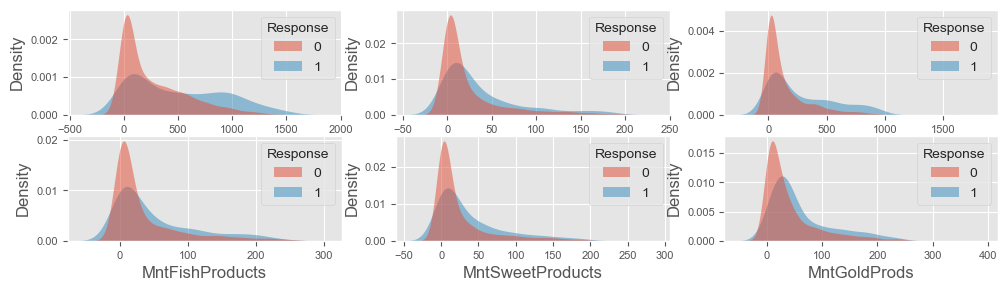

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(12,3))
sns.kdeplot(ax=axes[0,0], data=df, x="MntWines", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[0,1], data=df, x="MntFruits", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[0,2], data=df, x="MntMeatProducts", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[1,0], data=df, x="MntFishProducts", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[1,1], data=df, x="MntSweetProducts", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[1,2], data=df, x="MntGoldProds", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
plt.show()

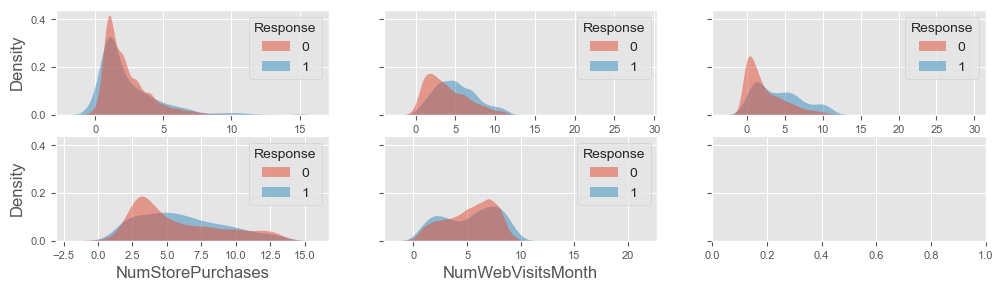

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(12,3), sharey=True)
sns.kdeplot(ax=axes[0,0], data=df, x="NumDealsPurchases", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[0,1], data=df, x="NumWebPurchases", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[0,2], data=df, x="NumCatalogPurchases", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[1,0], data=df, x="NumStorePurchases", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
sns.kdeplot(ax=axes[1,1], data=df, x="NumWebVisitsMonth", hue="Response",fill=True, common_norm=False, alpha=.5, linewidth=0,)
plt.show()

### Hubungan antar variabel

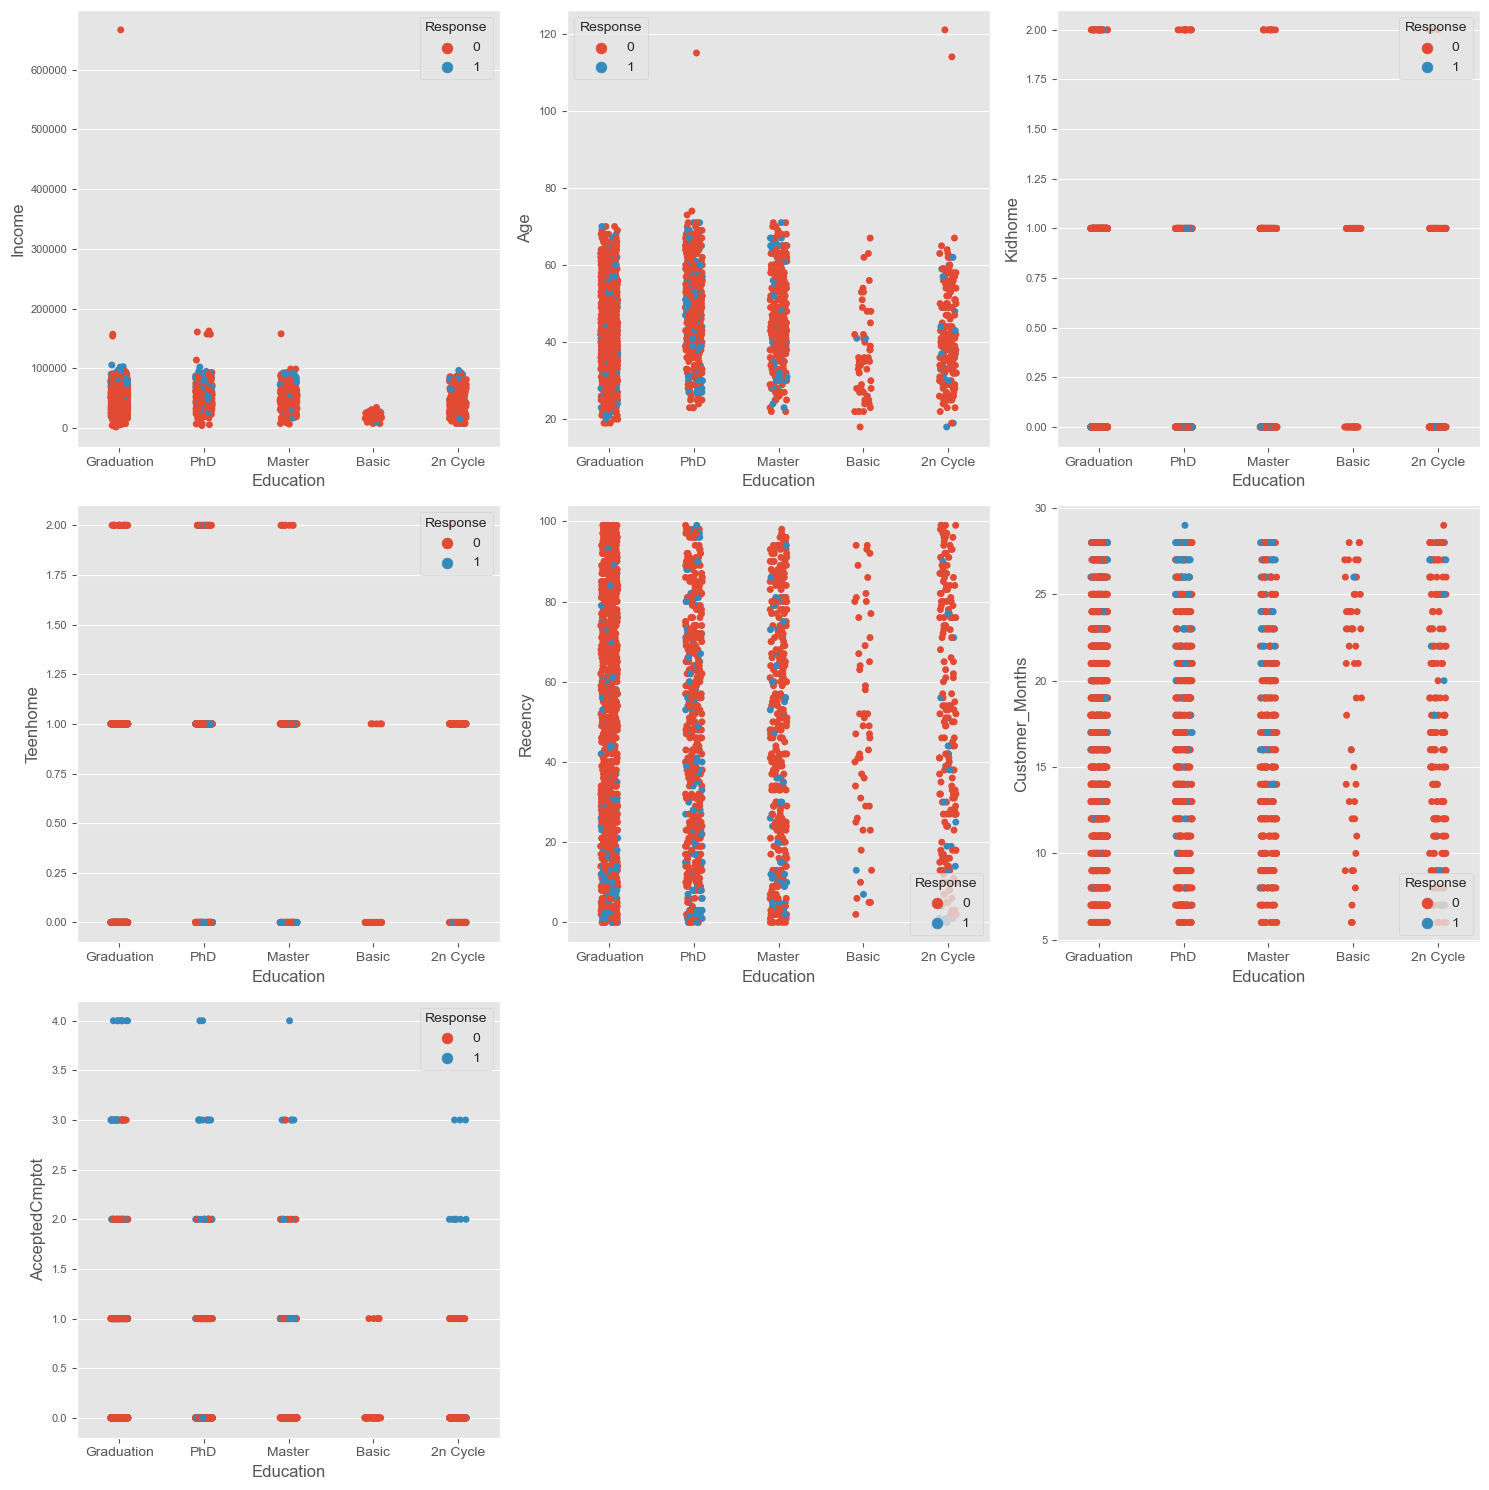

In [60]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(fontsize=10)
    plt.tight_layout()

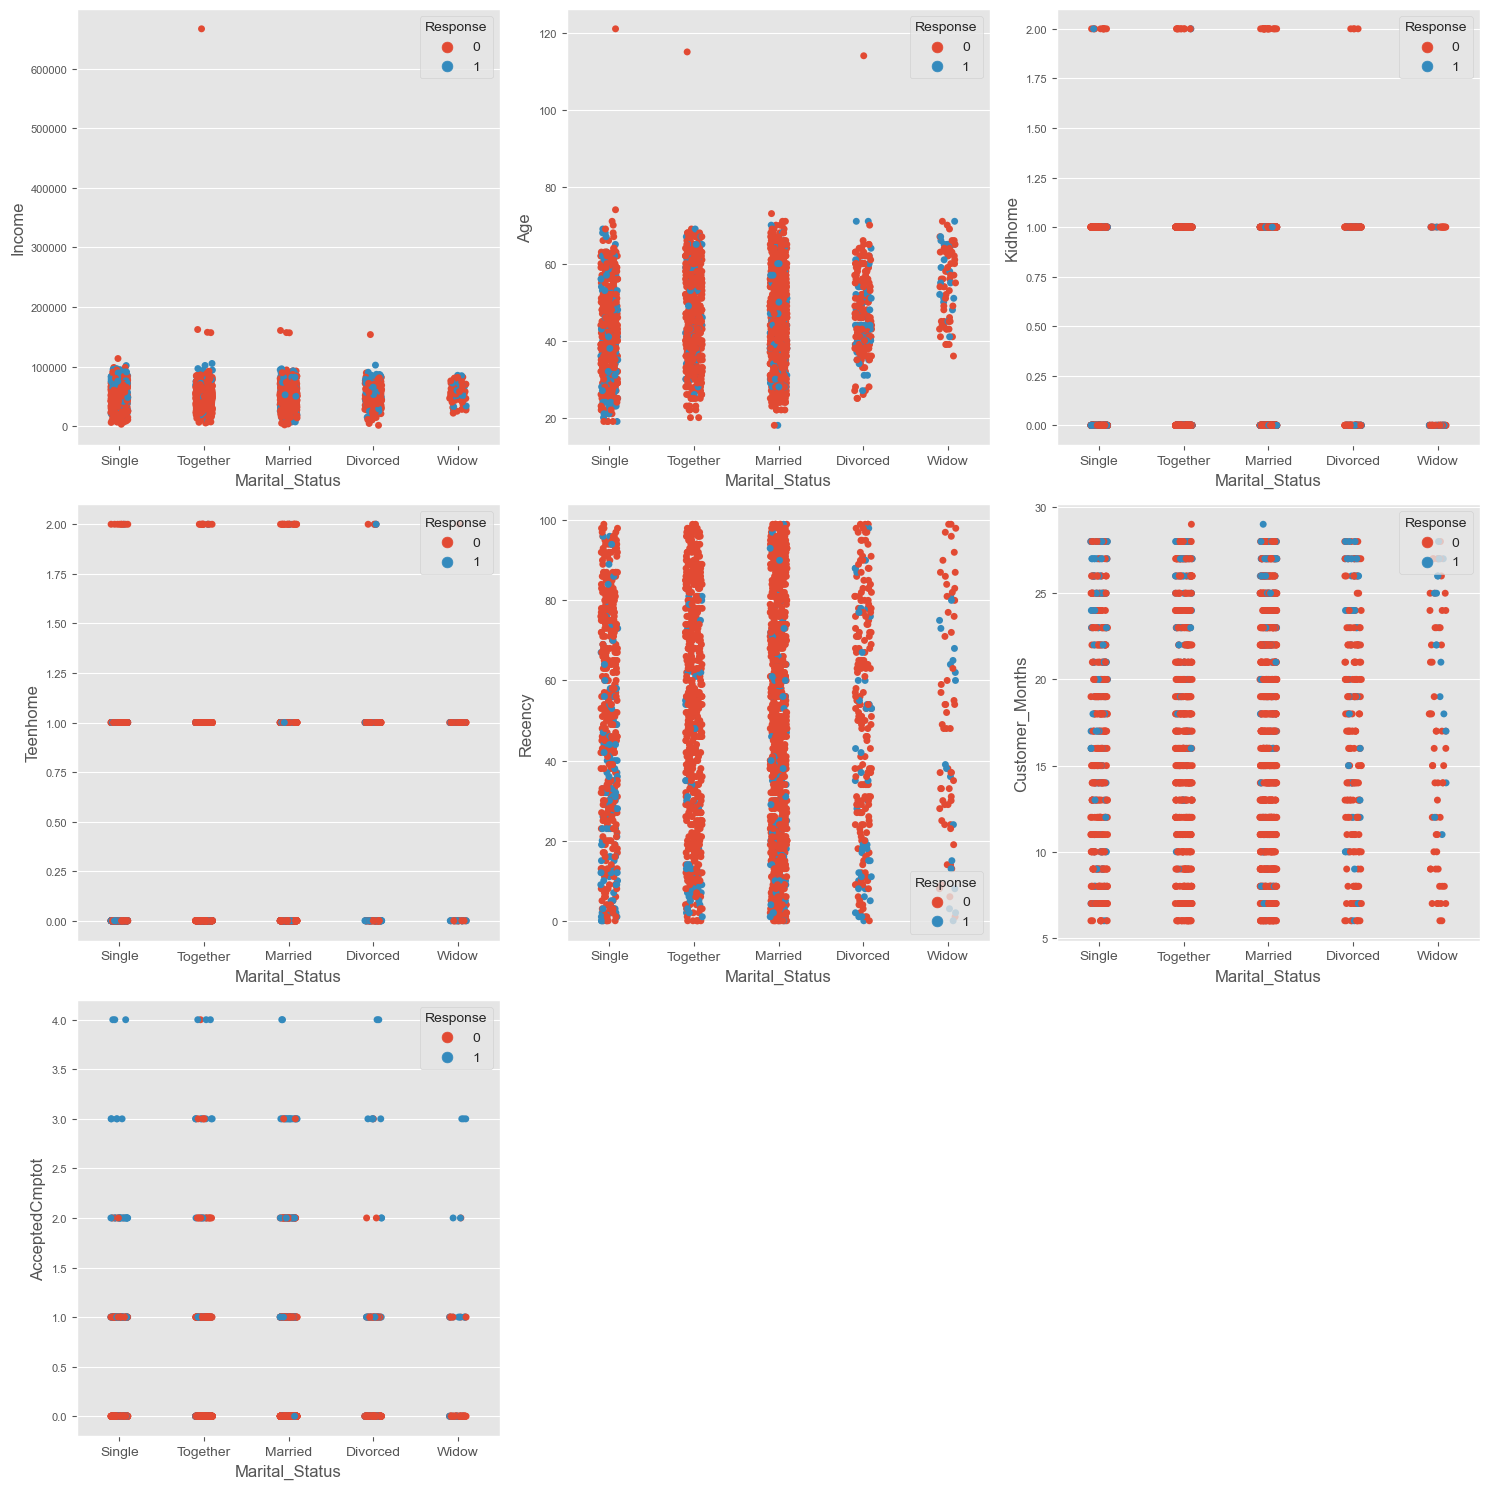

In [61]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(fontsize=10)
    plt.tight_layout()

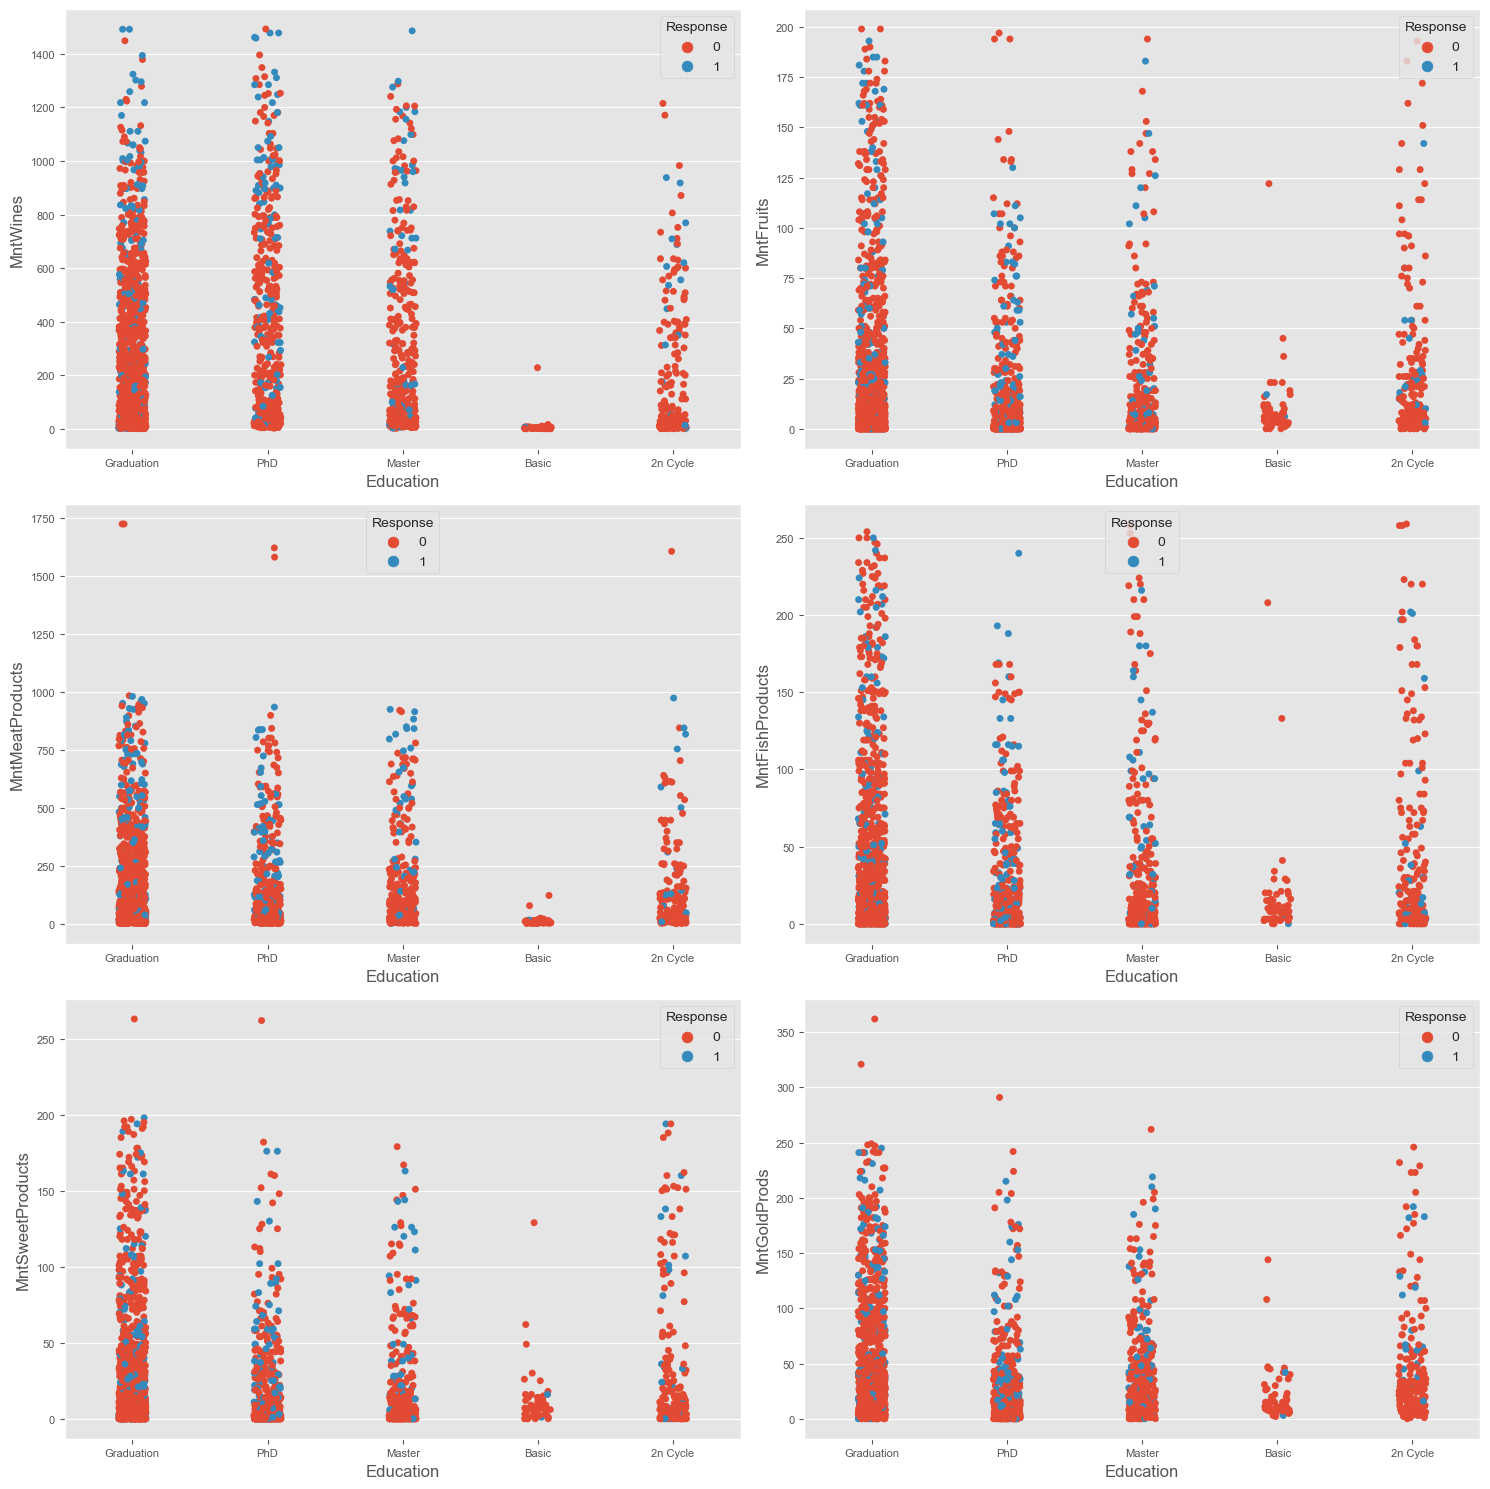

In [62]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

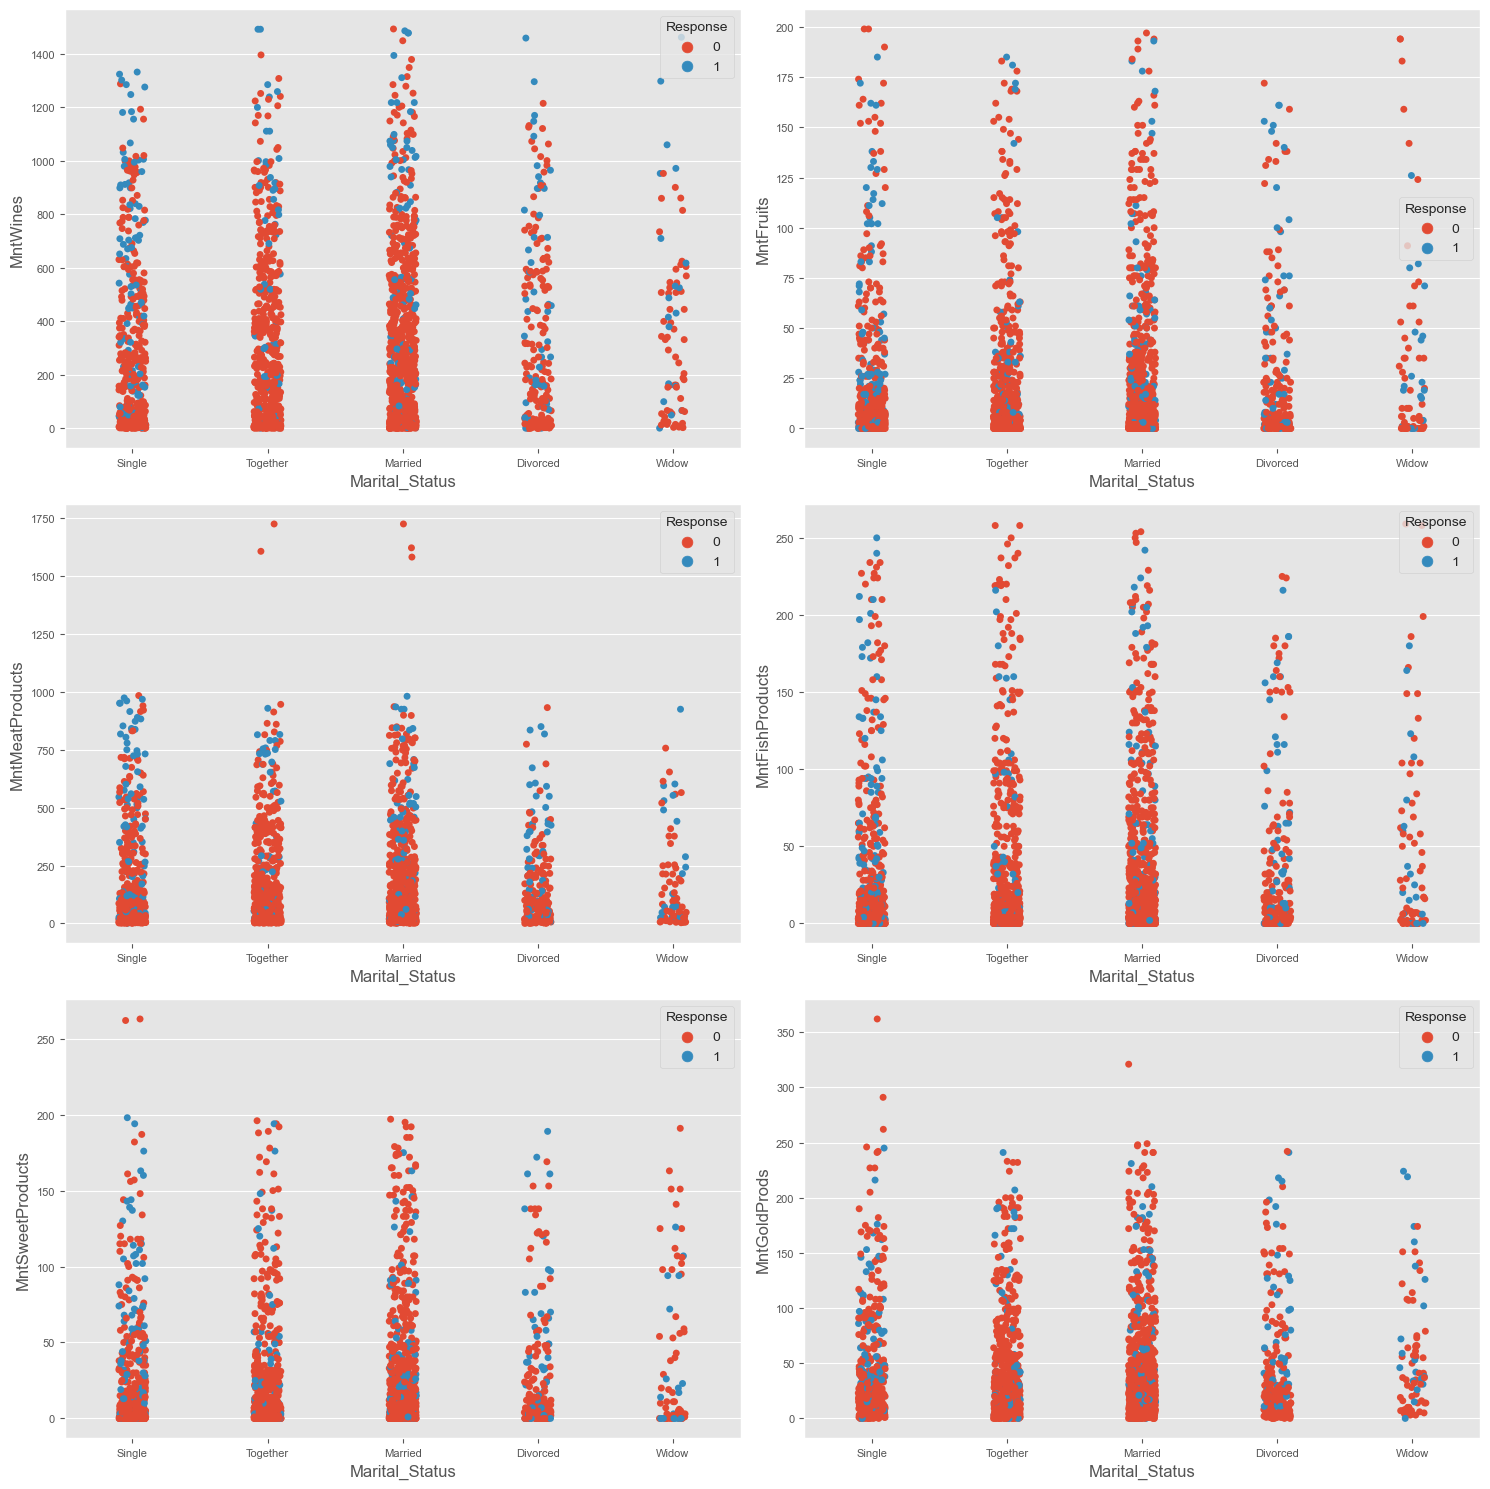

In [63]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

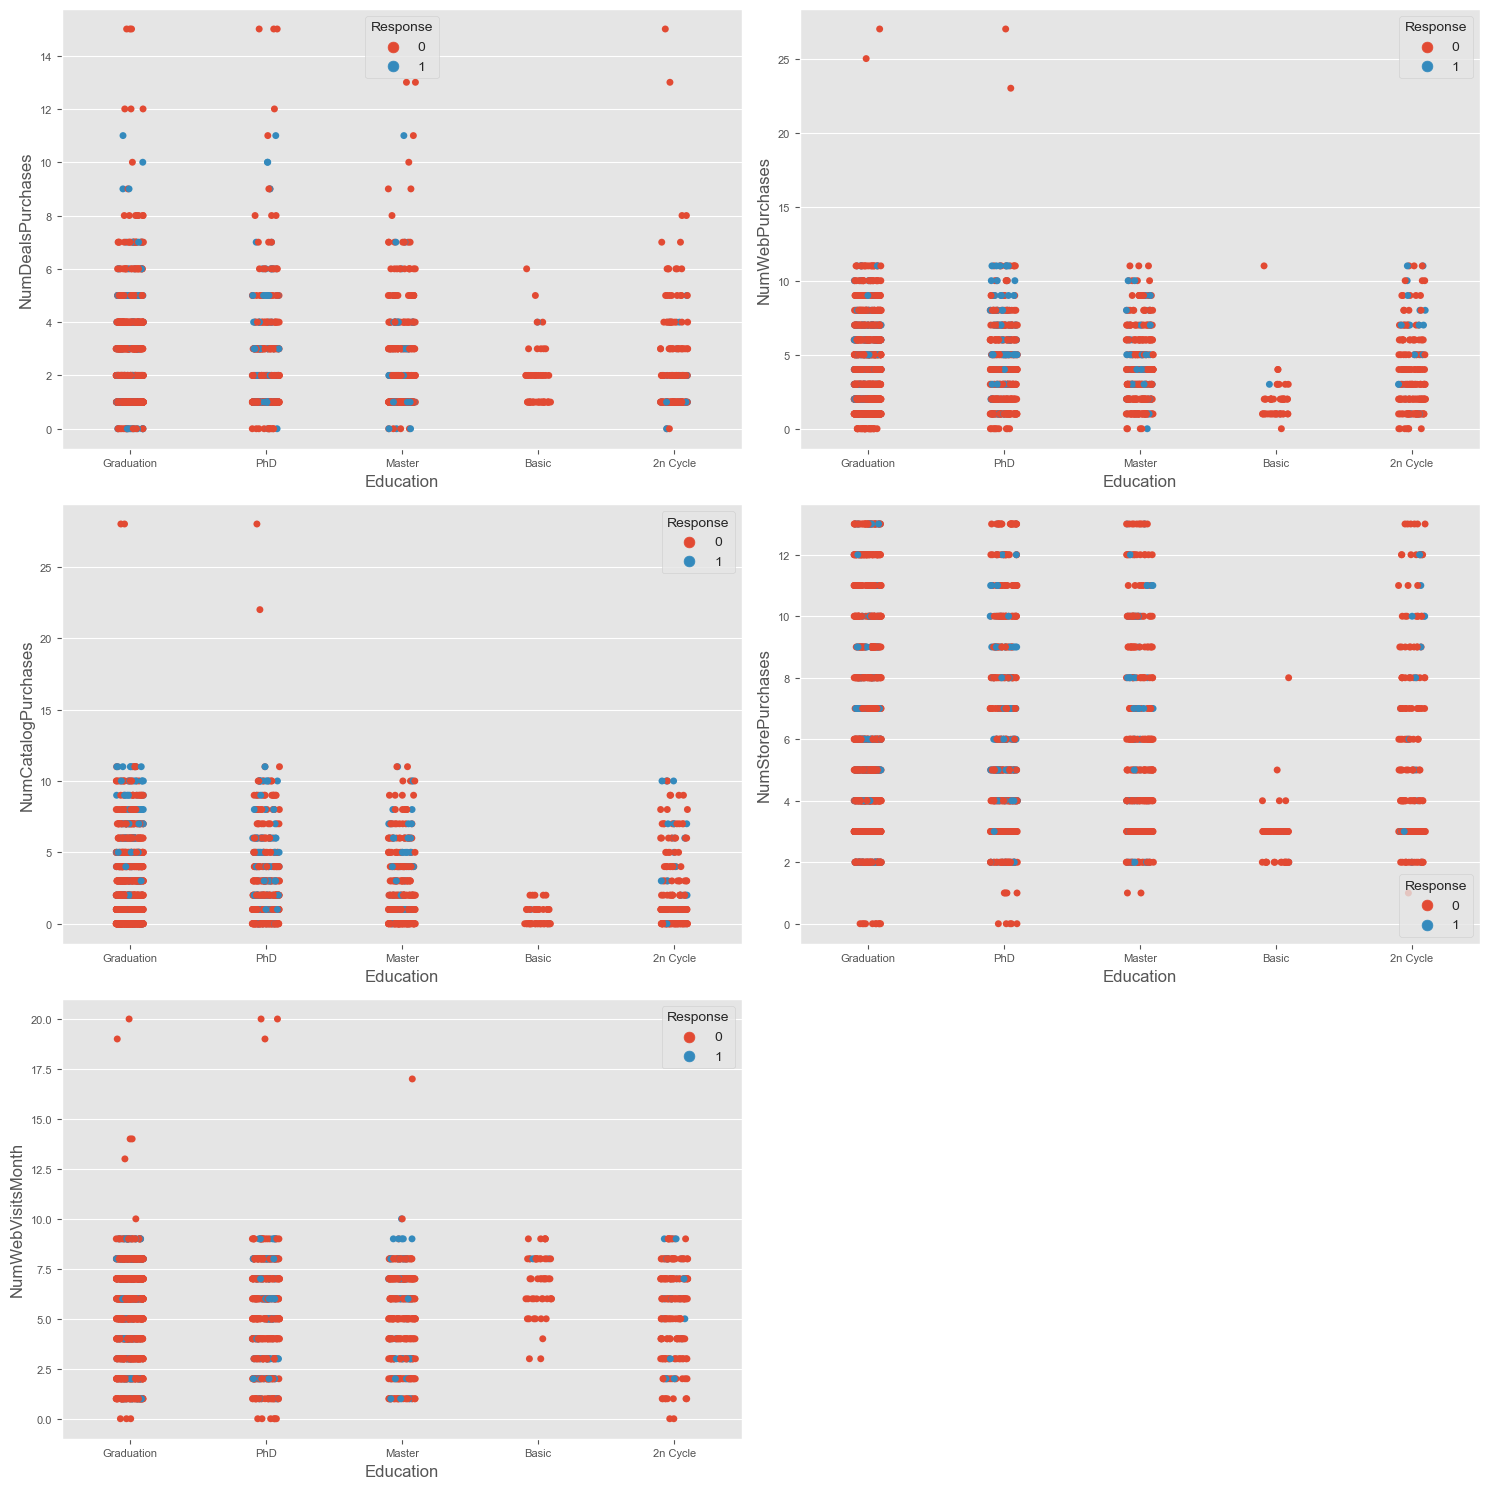

In [64]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

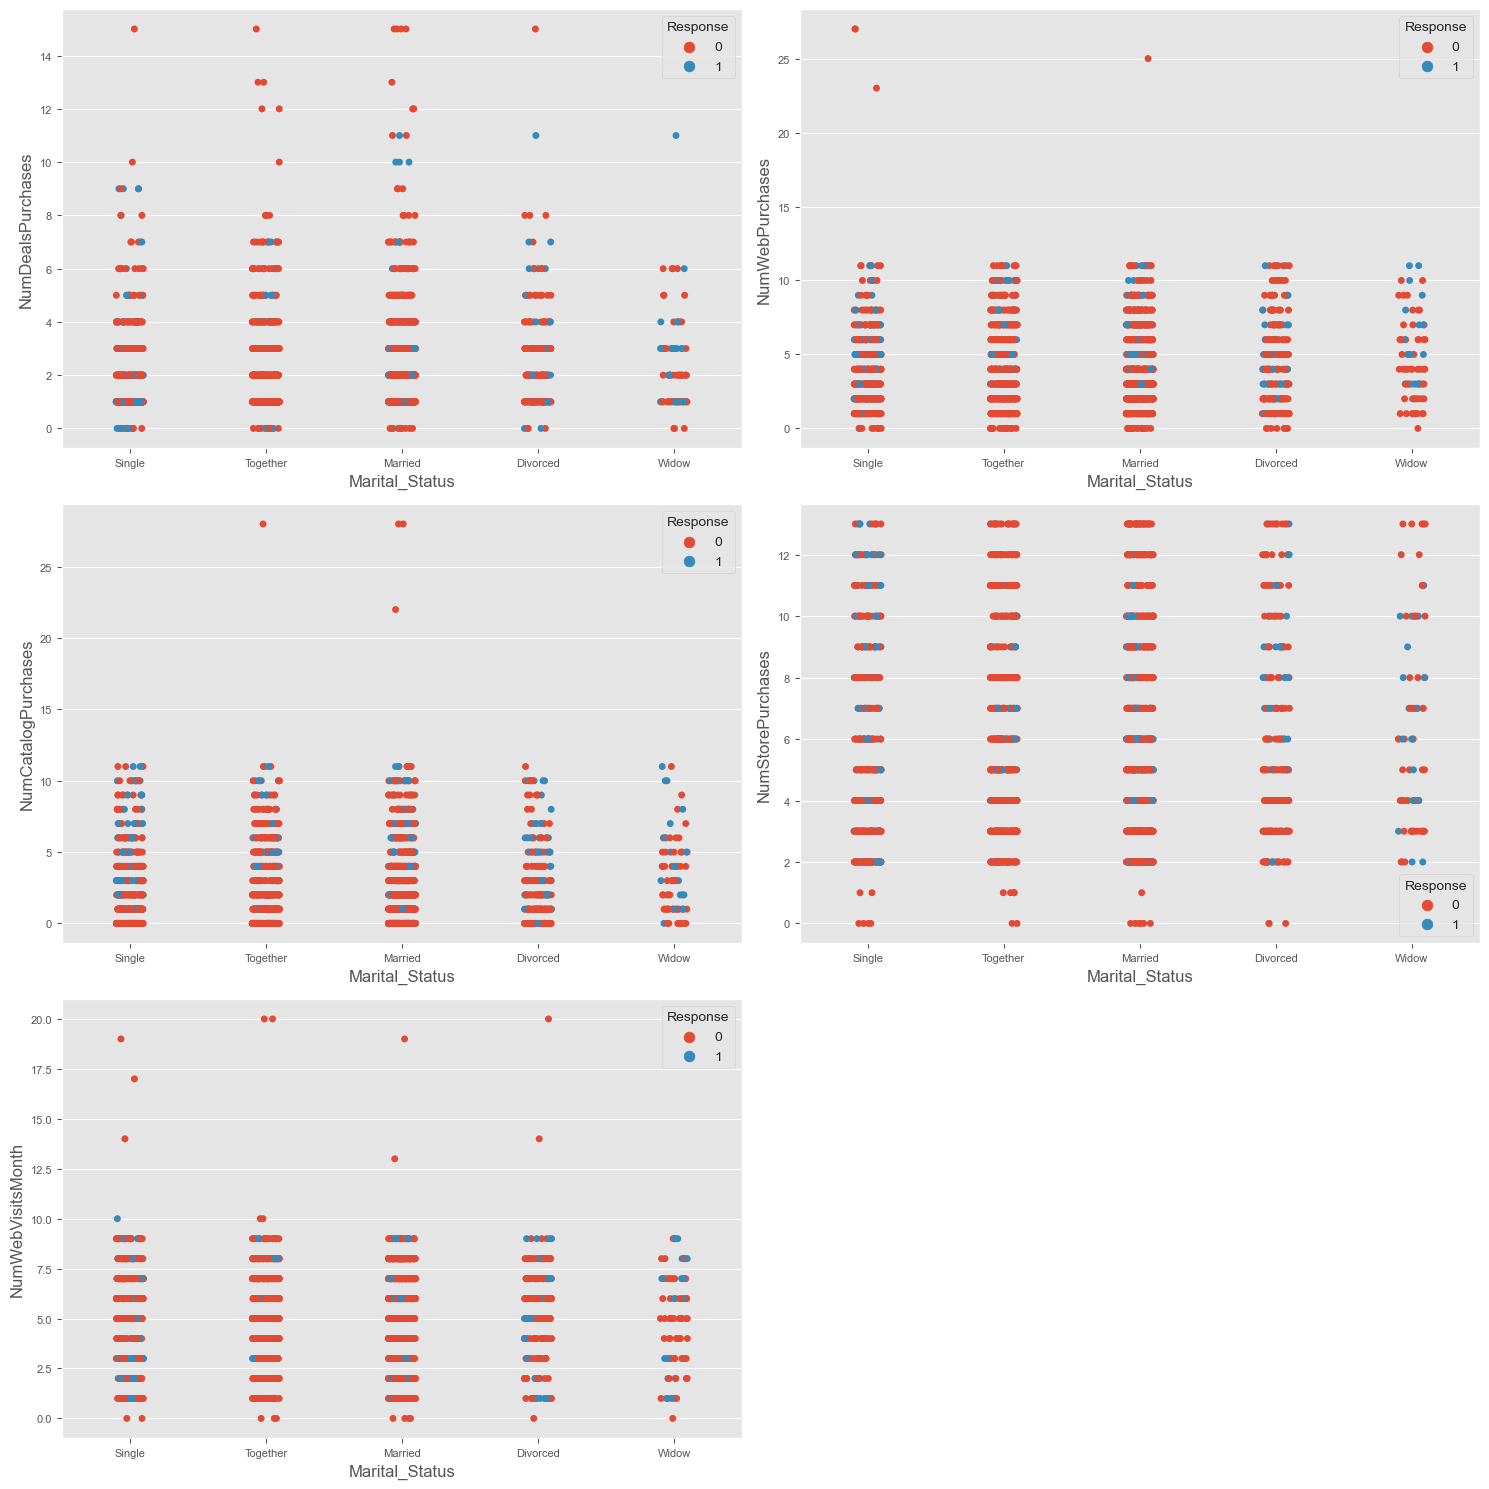

In [65]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

# Business Insight

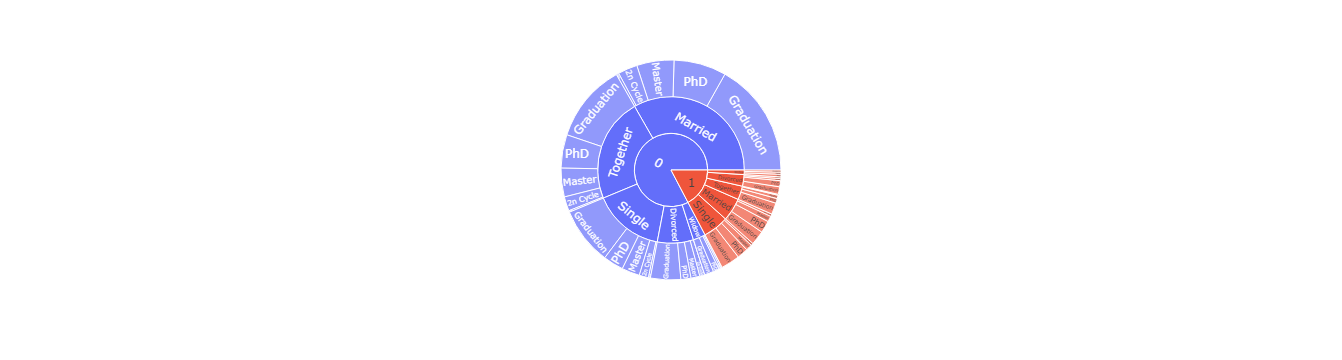

In [70]:
#bisnis insight : segmentasi target
# Pie Chart berdasarkan setiap kategori yang ditinjau dengan value masing-masing berdasarkan income customer
# Will be better if we can just make "Single, Divorced and Widowed as alone" and "Married and Together as In_Couple"
# Maybe we can segmentate age as Elder, Adult or Millenial
import plotly.express as px
fig = px.sunburst(df, path=['Response','Marital_Status', 'Education'], values='Income_new')
fig.show()

In [71]:
#Bussiness Insight : Hubungan Antara Jumlah Anak (Anak Kecil dan Remaja) dan Pengeluaran
kidhome = df.groupby('Kidhome')[spent].sum()
kidhome

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,583367,50935,328417,72618,52365,77628
1,93859,7657,43927,11068,8030,20145
2,3590,325,1624,371,226,836


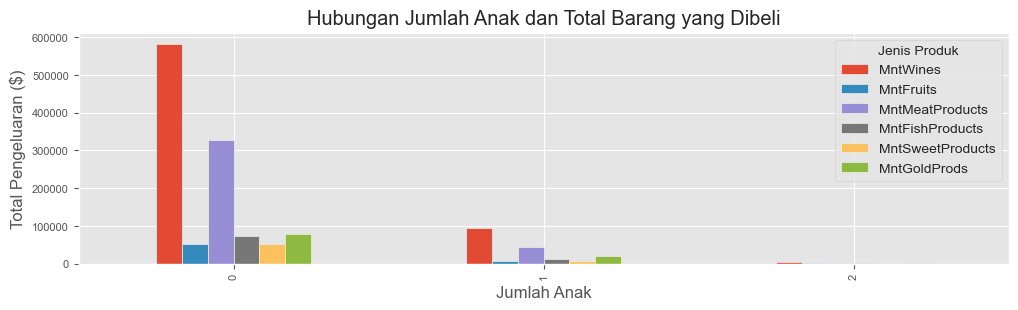

In [72]:
kidhome.plot(kind='bar')
plt.title('Hubungan Jumlah Anak dan Total Barang yang Dibeli')
plt.xlabel('Jumlah Anak')
plt.ylabel('Total Pengeluaran ($)')
plt.legend(title='Jenis Produk')
plt.show()

Dapat dilihat bahwa jumlah anak cukup mempengaruhi pengeluaran secara signifikan, akan tetapi ini masih dari jumlah anak yang dibawah usia remaja, bagaimana dengan anak anak yang berusia remaja ?

In [73]:
teenhome = df.groupby('Teenhome')[spent].sum()
teenhome

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,352985,38573,263005,56346,38945,52407
1,309010,19433,104475,26468,20840,43865
2,18821,911,6488,1243,836,2337


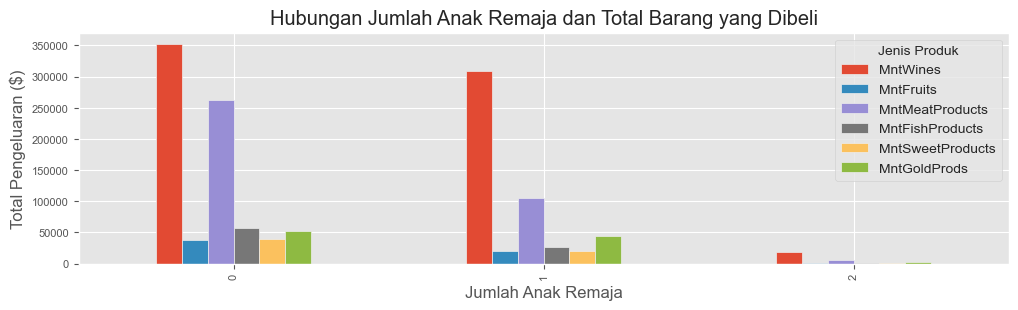

In [74]:
teenhome.plot(kind='bar')
plt.title('Hubungan Jumlah Anak Remaja dan Total Barang yang Dibeli')
plt.xlabel('Jumlah Anak Remaja')
plt.ylabel('Total Pengeluaran ($)')
plt.legend(title='Jenis Produk')
plt.show()

Ternyata jumlah dari pengeluaran juga tetap menurun akan tetapi jika dilihat lagi selisih dari mereka yang tidak memiliki anak kecil dengan yang memiliki 1 anak kecil cukup drastis jika dibandingkan dengan mereka yang tidak memiliki anak remaja dan memiliki 1 anak remaja.

Hal ini kemudian dapat dibandingkan lagi antara total transaksi dan jenis transaksi yang terjadi melalui platform apa bagi mereka yang memiliki anak kecil dan anak remaja

In [75]:
kidhomes = df.groupby('Kidhome')[purchase].sum()
kidhomes

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Kidhome,,,,,
0,2514,6431,5118,9332,5629
1,2558,2585,811,3473,5960
2,136,134,34,165,320


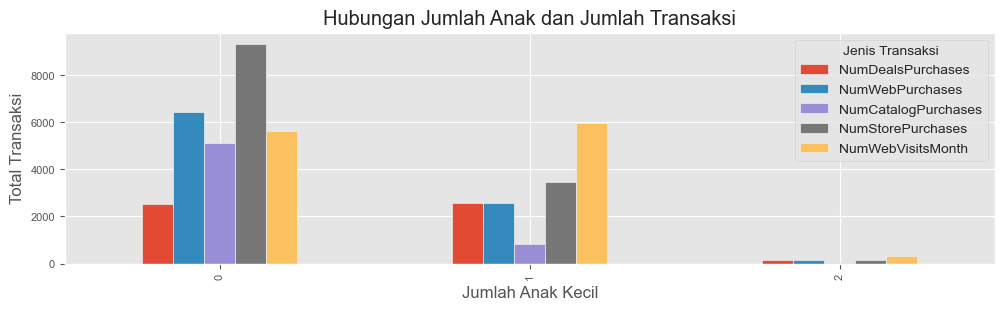

In [76]:
kidhomes.plot(kind='bar')
plt.title('Hubungan Jumlah Anak dan Jumlah Transaksi')
plt.xlabel('Jumlah Anak Kecil')
plt.ylabel('Total Transaksi')
plt.legend(title='Jenis Transaksi')
plt.show()

Selanjutnya adalah menampilkan transaksi yang dilakukan oleh mereka yang memiliki anak remaja di rumahnya

In [77]:
Teenhomes = df.groupby('Teenhome')[purchase].sum()
Teenhomes

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Teenhome,,,,,
0,1840,4240,3464,6528,5768
1,3186,4661,2374,6117,5854
2,182,249,125,325,287


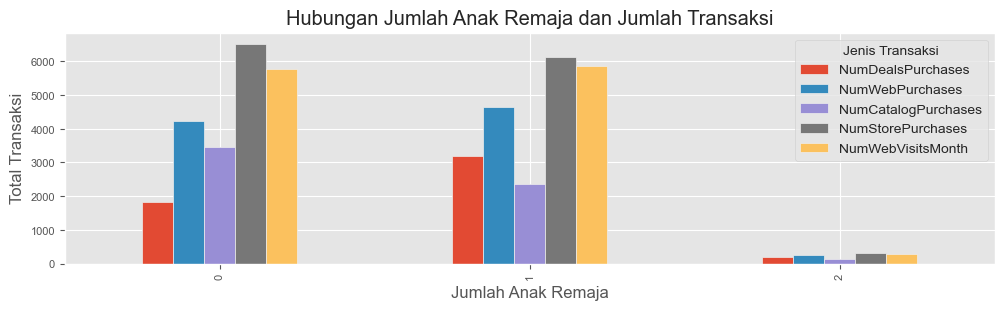

In [78]:
Teenhomes.plot(kind='bar')
plt.title('Hubungan Jumlah Anak Remaja dan Jumlah Transaksi')
plt.xlabel('Jumlah Anak Remaja')
plt.ylabel('Total Transaksi')
plt.legend(title='Jenis Transaksi')
plt.show()

In [79]:
#bisnis insight : Total Pengeluaran Berdasarkan Tingkat Pendapatan Dan Jenis-Jenis Produk

In [80]:
total_spending = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

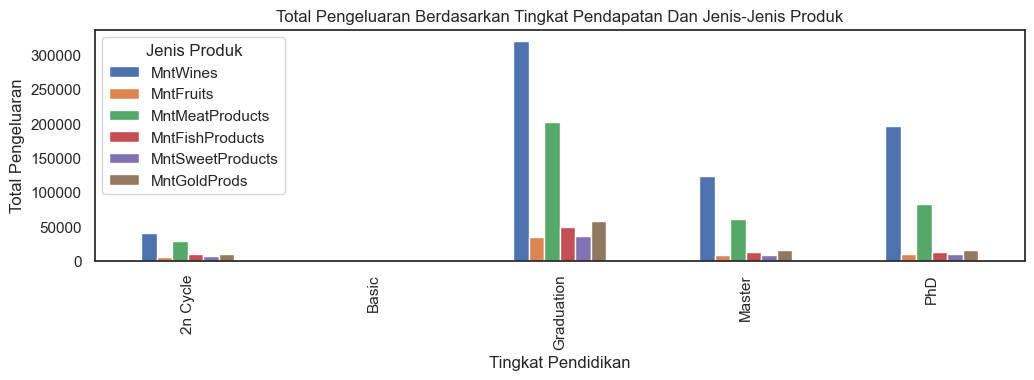

In [92]:
sns.set_theme(style="white")
total_spending.plot(kind='bar')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran Berdasarkan Tingkat Pendapatan Dan Jenis-Jenis Produk')
plt.legend(title='Jenis Produk')
plt.show()

In [88]:
#Business Income untuk melihat pengeluaran apa yang terbesar berdasarkan status customer
total_spending2 = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

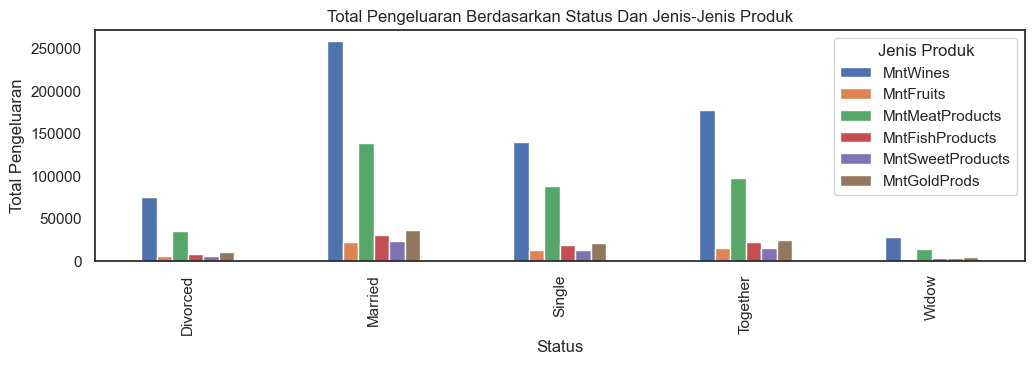

In [91]:
sns.set_theme(style="white")
total_spending2.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran Berdasarkan Status Dan Jenis-Jenis Produk')
plt.legend(title='Jenis Produk')
plt.show()

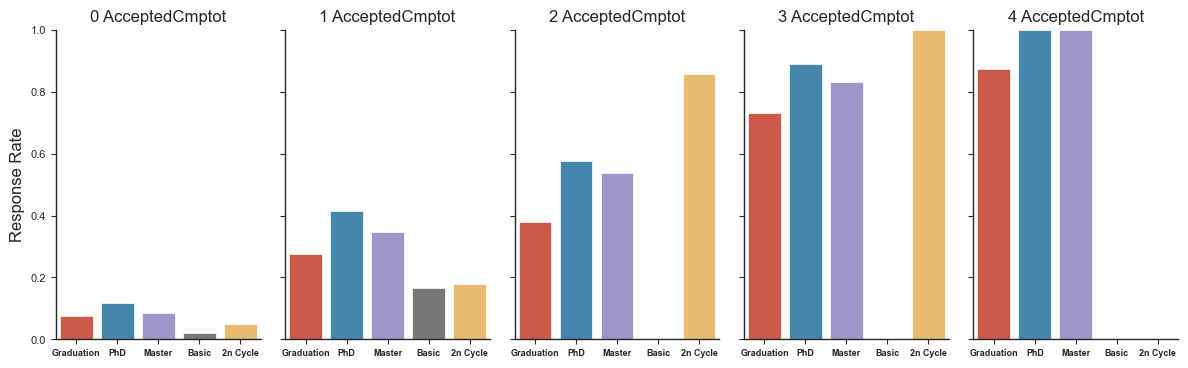

In [82]:
sns.set_style('ticks')
g = sns.catplot(
    data=df, x="Education", y="Response", col="AcceptedCmptot",
    kind="bar", height=4, aspect=.6, ci=None
)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 6.5,'fontweight': 'bold'} )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

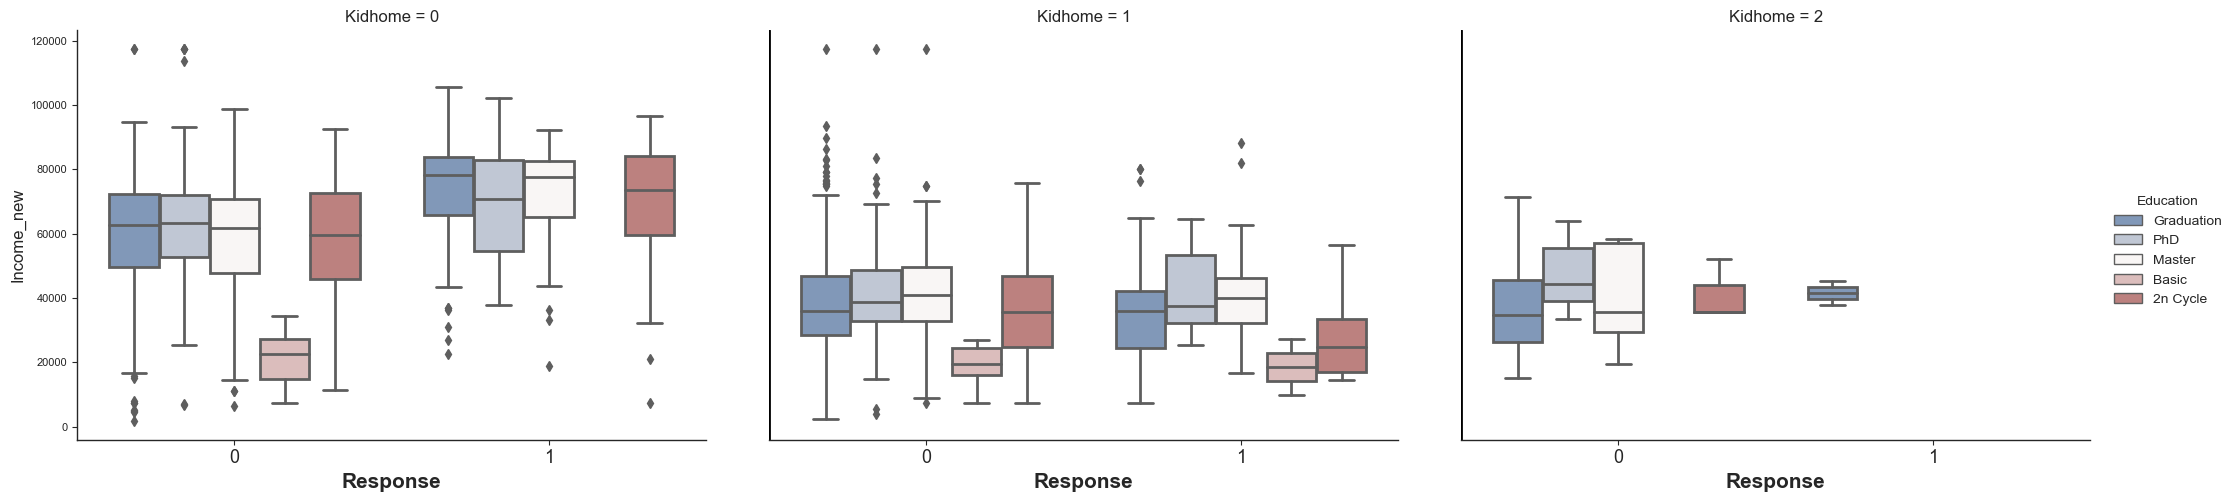

In [83]:
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Kidhome', hue='Education', height=5, aspect=11.7/8.27, palette='vlag')
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

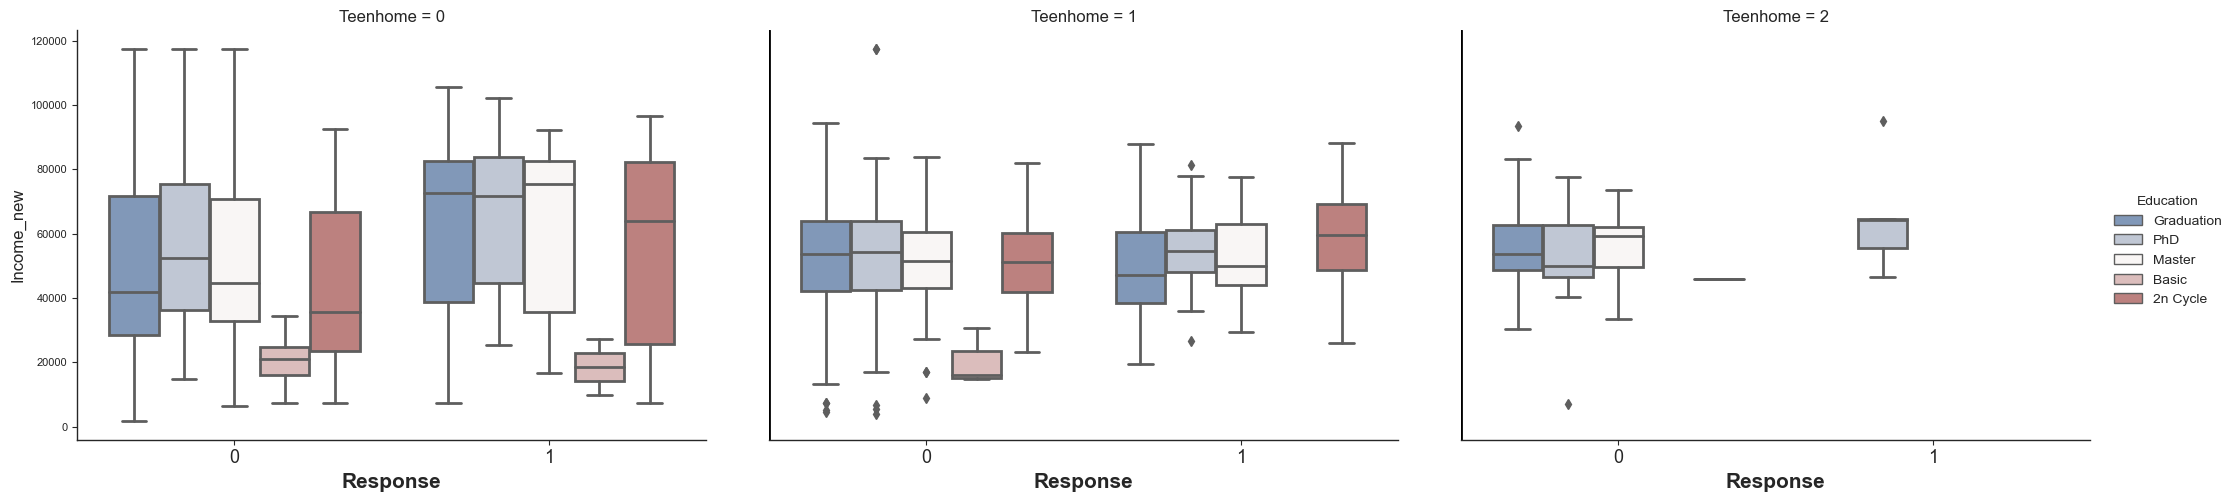

In [84]:
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Teenhome', hue='Education', height=5, aspect=11.7/8.27, palette='vlag')
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

In [85]:
#Business Income untuk melihat pengeluaran apa yang terbesar berdasarkan status customer
total_spending2 = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

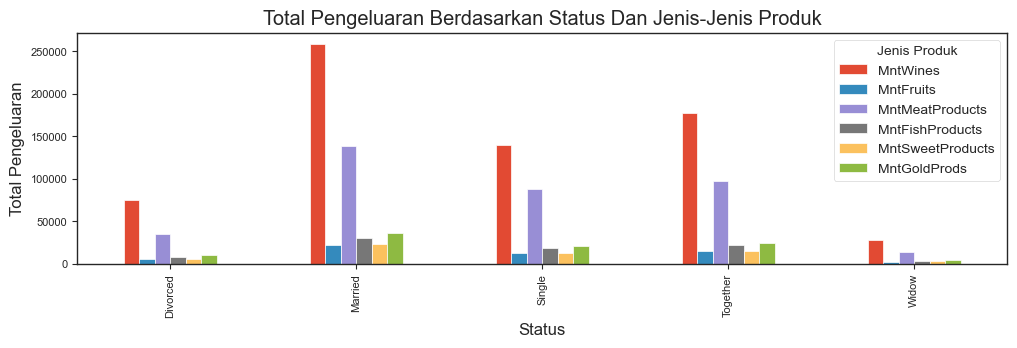

In [86]:
total_spending2.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran Berdasarkan Status Dan Jenis-Jenis Produk')
plt.legend(title='Jenis Produk')
plt.show()